In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [4]:
def simulate_ar1(phi_0, phi_1, T, random_state):
    y = np.zeros(T)
    if phi_1 == 1:
        y[0] = stats.norm.rvs(1)
    else:
        y[0] = phi_0 / (1-phi_1)
    epsilons = stats.norm.rvs(size = T, random_state = random_state)
    for t in range(1, T):
        y[t] = phi_0 + phi_1*y[t-1] + epsilons[t]
    return y

In [5]:
def produce_forecast(phi_0, phi_1, T, random_state, horizon):
    y = simulate_ar1(phi_0 = phi_0, phi_1 = phi_1, T = T, random_state = random_state)

    point_forecasts = []
    variances = []
    lower_bounds = []
    upper_bounds = []

    point_forecast = phi_0 + phi_1*y[T-1]
    error_variance = 1
    variance = error_variance

    point_forecasts.append(point_forecast)
    variances.append(variance)
    lower_bounds.append(point_forecast - 1.96*np.sqrt(variance))
    upper_bounds.append(point_forecast + 1.96*np.sqrt(variance))

    for i in range(1, horizon):
        point_forecast = phi_0 + phi_1*point_forecasts[i-1]
        variance = variances[i-1]*(phi_1**2)
        
        point_forecasts.append(point_forecast)
        variances.append(variance)
        lower_bounds.append(point_forecast - 1.96*np.sqrt(np.sum(variances)))
        upper_bounds.append(point_forecast + 1.96*np.sqrt(np.sum(variances)))

    point_forecasts = np.array(point_forecasts)
    variances = np.array(variances)
    lower_bounds = np.array(lower_bounds)
    upper_bounds = np.array(upper_bounds)
    
    return(y, point_forecasts, variances, lower_bounds, upper_bounds)

In [6]:
def plot_forecast(phi_0, phi_1, T, random_state, horizon, interval = False):
    y, point_forecasts, variances, lower_bounds, upper_bounds =  produce_forecast(phi_0 = phi_0, phi_1 = phi_1, T = T, random_state = random_state, horizon = horizon)
    fig = plt.figure(figsize = (8,4.5))
    plt.plot(range(T-50, T), y[-50:])
    plt.xlabel('Период')
    plt.ylabel('Значение')
    plt.title(r'Cимуляция процесса $Y_t = %.2f + %.2f Y_{t-1} + \varepsilon_t$' %(phi_0, phi_1))
    plt.hlines(y = y[0], xmin =T-50, xmax = T, color = 'r', linestyles = '--')
    plt.plot(range(T, T + horizon), point_forecasts, linestyle = ':', color = 'green')
    if interval:
        plt.plot(range(T, T + horizon), lower_bounds, linestyle = ':', color = 'red')
        plt.plot(range(T, T + horizon), upper_bounds, linestyle = ':', color = 'red')
    plt.show()

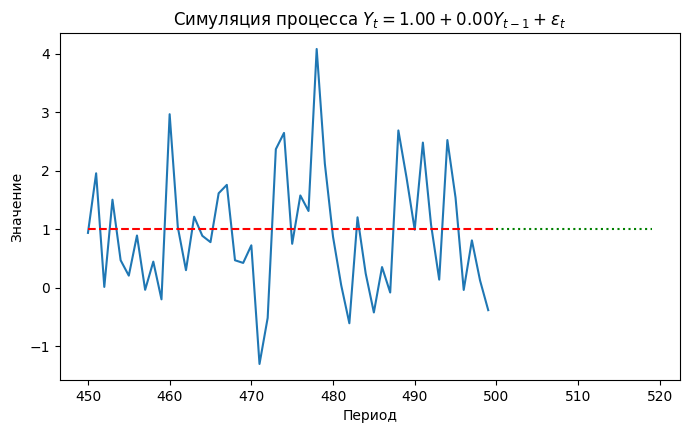

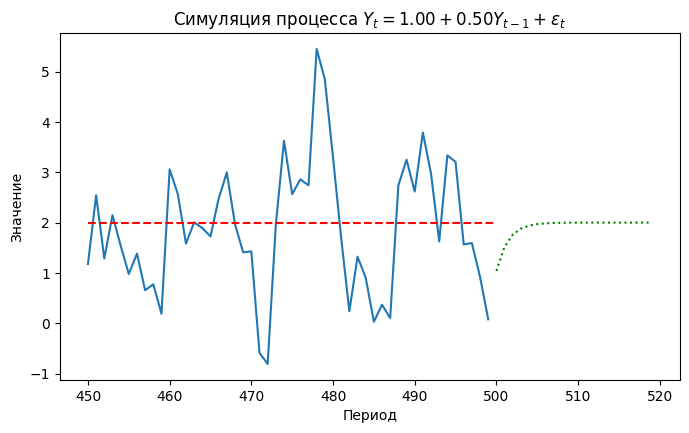

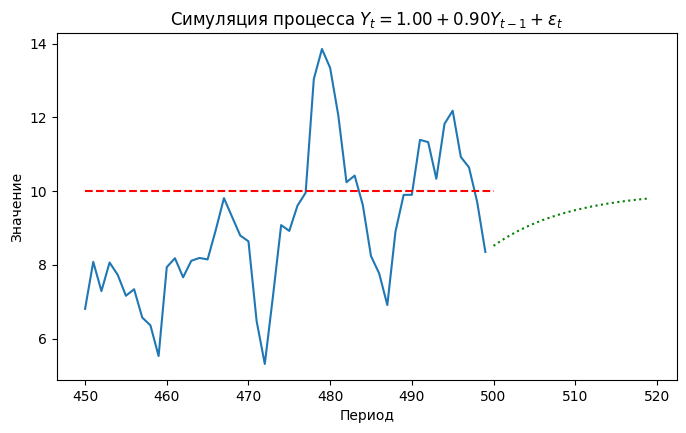

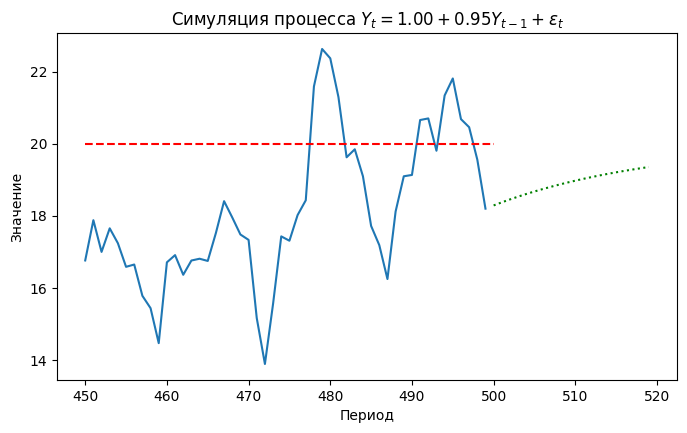

In [10]:
phi_0 = 1
T = 500
horizon = 20
for phi_1 in [0, 0.5, 0.9, 0.95]:
    plot_forecast(phi_0 = phi_0, phi_1 = phi_1, T = T, random_state = 42, horizon = horizon)

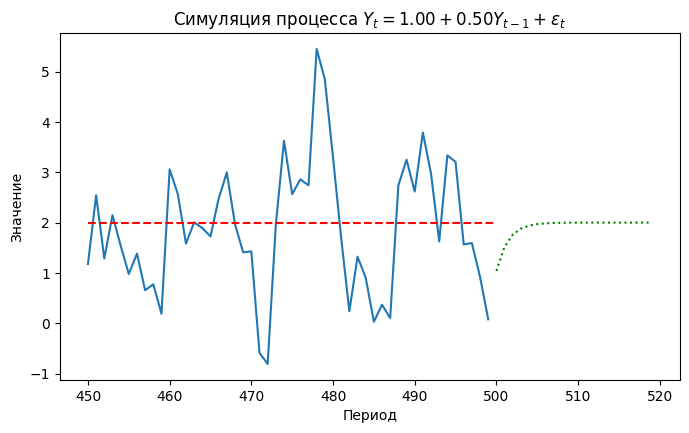

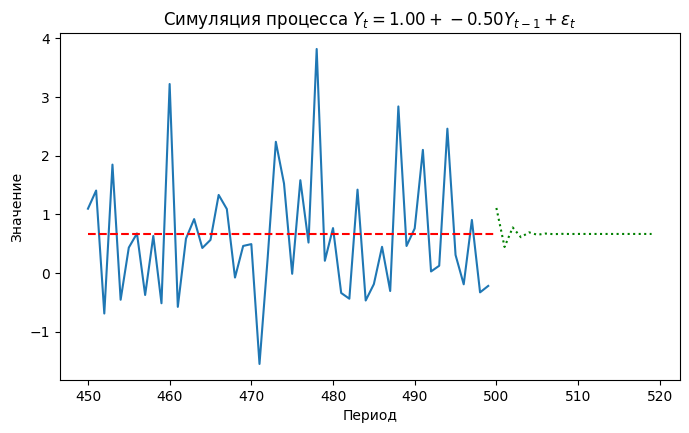

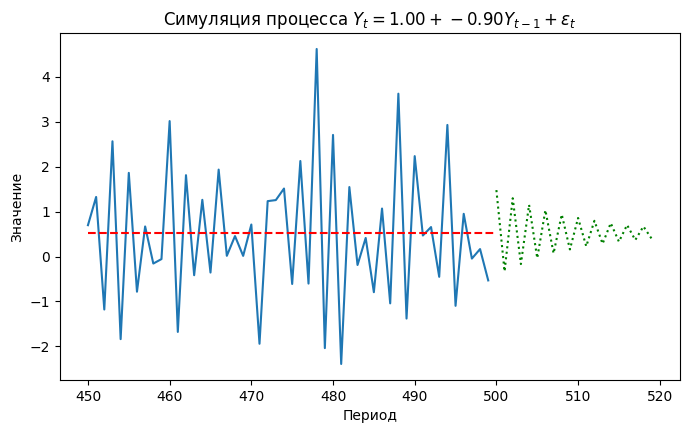

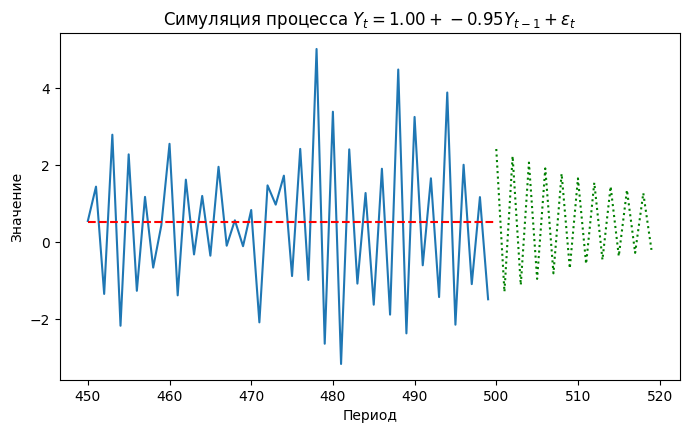

In [11]:
for phi_1 in [0.5, -0.5, -0.9, -0.95]:
    plot_forecast(phi_0 = phi_0, phi_1 = phi_1, T = T, random_state = 42, horizon = horizon)